In [1]:
#import tdt
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
with open('C://Data//hislight_pickles//adlib_dark.pickle', 'rb') as handle:
    restricted_dark = pickle.load(handle)

In [3]:
mouse_to_be_analyzed = "HL210"
#210 looks nice

In [ ]:
run_length = []
run_licks  = []

snips_start= []
snips_end= []
    
kwargs={"bins":150, "trial_length":15, "baseline_length":5}    
    
for key, val in restricted_dark.items():
    if val["mouse_ID"] == mouse_to_be_analyzed:
        lickdata= tp.lickCalc(val["licks"], minrunlength=3)
        
        run_length.append(lickdata["rTime"])
        run_licks.append(lickdata["rLicks"])
       
        snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
        snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])
        

run_length = tp.flatten_list(run_length)
run_licks = tp.flatten_list(run_licks)

snips_start = np.vstack(snips_start)
snips_end = np.vstack(snips_end)

In [4]:
run_length = []
run_licks  = []

snips_start= []
snips_end= []
    
kwargs={"bins":150, "trial_length":15, "baseline_length":5}    
    
for key, val in restricted_dark.items():
    if val["mouse_ID"] == mouse_to_be_analyzed:
        lickdata= tp.lickCalc(val["licks"], minrunlength=3)
        
        run_length.append(lickdata["rTime"])
        run_licks.append(lickdata["rLicks"])
        
        temp_snips_start= tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
        
       
        snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
        snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])
        

run_length = tp.flatten_list(run_length)
run_licks = tp.flatten_list(run_licks)

snips_start = np.vstack(snips_start)
snips_end = np.vstack(snips_end)

SyntaxError: invalid syntax (<ipython-input-4-4df38ceb57c0>, line 16)

NameError: name 'snips_start' is not defined

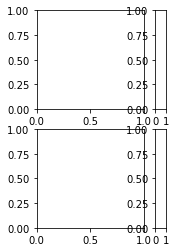

In [5]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[3,4],
                                        gridspec_kw={"width_ratios":[10,1], "left":0.2, "right":0.8})



sns.heatmap(snips_start, ax=ax1, cbar_ax= ax2, cmap="viridis", vmax=0.5, vmin=-0.5, cbar_kws={"ticks": [0.5, 0, -0.5]})
tp.shadedError(ax3, snips_start)
ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="white")

ax3.set_xticks([0, 50, 100, 150])
ax3.set_xticklabels(["-5", "0", "5", "10"])

ax3.set_xlabel("time (s)")
ax3.set_ylabel("something")
ax1.set_ylabel("trials")

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\rep_run_start.pdf")


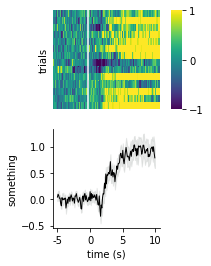

In [7]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[3,4],
                                        gridspec_kw={"width_ratios":[10,1], "left":0.2, "right":0.8})



sns.heatmap(snips_end, ax=ax1, cbar_ax= ax2, cmap="viridis", vmax=1, vmin=-1, cbar_kws={"ticks": [1, 0, -1]})
tp.shadedError(ax3, snips_end)
ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="white")

ax3.set_xticks([0, 50, 100, 150])
ax3.set_xticklabels(["-5", "0", "5", "10"])

ax3.set_xlabel("time (s)")
ax3.set_ylabel("something")
ax1.set_ylabel("trials")

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\rep_run_end.pdf")

In [8]:
AUC_start = np.trapz(snips_start[:,50:])
AUC_end = np.trapz(snips_end[:,50:])

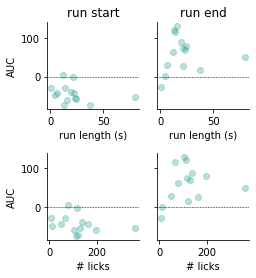

In [9]:
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[4,4],
                                        gridspec_kw={"width_ratios":[1,1], "left":0.2, "hspace":0.5},
                                       sharey=True)


ax1.scatter(run_length, AUC_start, alpha=0.3, color= "#219C90")
ax3.scatter(run_licks, AUC_start, alpha=0.3, color= "#219C90")

ax2.scatter(run_length, AUC_end, alpha=0.3, color= "#219C90")
ax4.scatter(run_licks, AUC_end, alpha=0.3, color= "#219C90")

ax1.axhline(0, color="black", linestyle="--", linewidth=0.5)
ax2.axhline(0, color="black", linestyle="--", linewidth=0.5)
ax3.axhline(0, color="black", linestyle="--", linewidth=0.5)
ax4.axhline(0, color="black", linestyle="--", linewidth=0.5)

ax1.set_xlabel("run length (s)")
ax3.set_xlabel("# licks")
ax2.set_xlabel("run length (s)")
ax4.set_xlabel("# licks")

ax1.set_ylabel("AUC")
ax3.set_ylabel("AUC")
#ax2.set_ylabel("AUC")
#ax4.set_ylabel("AUC")

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax1.set_title("run start")
ax2.set_title("run end")



f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\rep_runs_vs_AUC.pdf")

In [10]:
len(AUC_start)

14

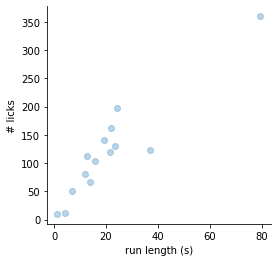

In [16]:
#relationship between run length and licks?

f, ax = plt.subplots(figsize=[4,4])

ax.set_xlabel("run length (s)")
ax.set_ylabel("# licks")
ax.scatter(run_length, run_licks, alpha=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

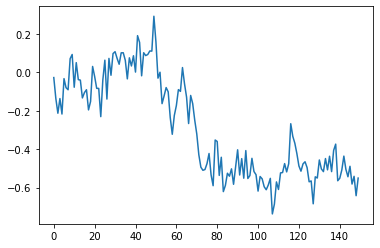

In [9]:
f,ax=plt.subplots()

ax.plot(np.mean(snips_start, axis=0))

<AxesSubplot:>

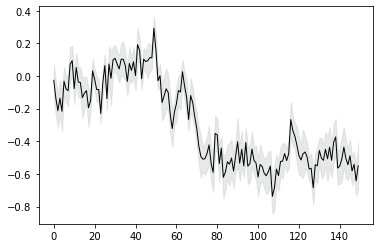

In [10]:
f,ax=plt.subplots()

tp.shadedError(ax,snips_start)

<AxesSubplot:>

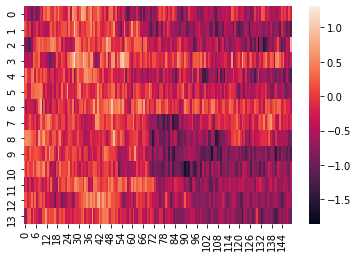

In [11]:
f,ax=plt.subplots()

sns.heatmap(snips_start)

In [10]:
s= np.argsort(run_length)

In [11]:
snips_start_sorted = snips_start[s,:]

<AxesSubplot:>

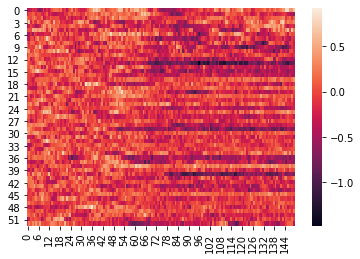

In [12]:
f,ax=plt.subplots()

sns.heatmap(snips_start_sorted)

In [ ]:
def sort_runs(runs):
    sort_order = np.argsort([x[-1]for x in runs])
    runs_sorted = [runs[i] for i in sort_order]
    
    return runs_sorted 